## Transaction Insights Analysis
- By Alif Dio Af'Ally

### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Wrangling

    - File Name : transactions.csv
    - File Type : .csv
    - Total Entries : 1000
    - Link Dataset yang Digunakan: [UPI Payment Transactions Dataset](https://www.kaggle.com/datasets/devildyno/upi-payment-transactions-dataset)


- Gathering Data

In [2]:
# Load Data "transactions.csv"
df = pd.read_csv('transactions.csv')

In [3]:
# Menampilkan 5 baris awal data "transactions.csv"
df.head()

,Transaction ID,Timestamp,Sender Name,Sender UPI ID,Receiver Name,Receiver UPI ID,Amount (INR),Status
0,4d3db980-46cd-4158-a812-dcb77055d0d2,2024-06-22 04:06:38,Tiya Mall,4161803452@okaxis,Mohanlal Golla,7776849307@okybl,3907.34,FAILED
1,099ee548-2fc1-4811-bf92-559c467ca792,2024-06-19 06:04:49,Mohanlal Bakshi,8908837379@okaxis,Mehul Sankaran,7683454560@okaxis,8404.55,SUCCESS
2,d4c05732-6b1b-4bab-90b9-efe09d252b99,2024-06-04 04:56:09,Kismat Bora,4633654150@okybl,Diya Goel,2598130823@okicici,941.88,SUCCESS
3,e8df92ee-8b04-4133-af5a-5f412180c8ab,2024-06-09 09:56:07,Ayesha Korpal,7018842771@okhdfcbank,Rhea Kothari,2246623650@okaxis,8926.00,SUCCESS
4,e7d675d3-04f1-419c-a841-7a04662560b7,2024-06-25 08:38:19,Jivin Batta,1977143985@okybl,Baiju Issac,5245672729@okybl,2800.55,SUCCESS


In [4]:
# Menampilkan 5 baris akhir data "transactions.csv"
df.tail()

,Transaction ID,Timestamp,Sender Name,Sender UPI ID,Receiver Name,Receiver UPI ID,Amount (INR),Status
995,843d87b5-902e-4336-9438-aa76d74e13e4,2024-07-03 23:15:06,Anay Karan,7041132054@okhdfcbank,Dhanush Salvi,7858014473@okicici,9270.15,SUCCESS
996,2dbbb577-4617-44b1-9a51-5fdf18ebb2ab,2024-06-15 15:42:57,Nirvaan Aurora,1200592114@okybl,Faiyaz Kara,2795494339@okhdfcbank,2278.32,FAILED
997,7c38e684-5968-432e-8acb-5bbe0f718fad,2024-06-18 17:27:37,Bhamini Srinivasan,6922445535@okicici,Mishti Kala,5207563362@okybl,4857.89,FAILED
998,27624b55-fd6d-45ce-bbc5-0c2958d48865,2024-06-05 21:57:36,Krish Kohli,4638471232@okhdfcbank,Sahil Bail,9348631179@okaxis,9475.68,FAILED
999,b792bf64-2047-4435-aac1-27ee95b134d6,2024-06-21 15:52:40,Diya Trivedi,0385561234@oksbi,Dhanuk Mane,1884708567@okhdfcbank,1426.60,SUCCESS


- Asessing Data

In [5]:
# Memeriksa tipe data dari tiap kolom di "transactions.csv"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction ID   1000 non-null   object 
 1   Timestamp        1000 non-null   object 
 2   Sender Name      1000 non-null   object 
 3   Sender UPI ID    1000 non-null   object 
 4   Receiver Name    1000 non-null   object 
 5   Receiver UPI ID  1000 non-null   object 
 6   Amount (INR)     1000 non-null   float64
 7   Status           1000 non-null   object 
dtypes: float64(1), object(7)
memory usage: 62.6+ KB


In [6]:
# Memeriksa apakah terdapat "Missing Value"
df.isna().sum()

Transaction ID     0
Timestamp          0
Sender Name        0
Sender UPI ID      0
Receiver Name      0
Receiver UPI ID    0
Amount (INR)       0
Status             0
dtype: int64

In [7]:
# Memeriksa apakah terdapat "Data Duplikat"
print("Jumlah Data Duplikat : ", df.duplicated().sum())

Jumlah Data Duplikat :  0


- Hasil Identifikasi Awal Data

Berikut ini merupakan hasil identifikasi dari data yang akan digunakan

| Tipe Data       | Missing Value | Duplicate Data | Inaccurate Value
|:---------------:|:------------:|:-----------:|:-----------:|
| Terdapat kesalahan tipe data di kolom "Timestamp | Tidak Ada | Tidak Ada | Tidak Ada |



- Data Cleaning

In [8]:
# Konversi kolom Timestamp menjadi datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [9]:
# Memastikan tipe data kolom "Timestamp" sudah terganti
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction ID   1000 non-null   object        
 1   Timestamp        1000 non-null   datetime64[ns]
 2   Sender Name      1000 non-null   object        
 3   Sender UPI ID    1000 non-null   object        
 4   Receiver Name    1000 non-null   object        
 5   Receiver UPI ID  1000 non-null   object        
 6   Amount (INR)     1000 non-null   float64       
 7   Status           1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 62.6+ KB


### EDA (Exploratory Data Analysis) 

- Persentase transaksi gagal

In [10]:
# Persentase transaksi gagal
fail_transactions = df[df['Status'] == 'FAILED']
total_transactions = len(df)
percent_fail = len(fail_transactions) / total_transactions * 100

# Output
(f'Persentase Transaksi Gagal : {percent_fail:.2f}%')

'Persentase Transaksi Gagal : 49.80%'

- Rata-rata jumlah uang pada transaksi gagal

In [11]:
average_fail_amount = fail_transactions['Amount (INR)'].mean()

# Output
print(f'Rata-rata Jumlah Uang pada Transaksi Gagal: {average_fail_amount:.2f}')

Rata-rata Jumlah Uang pada Transaksi Gagal: 4938.69


- Tren Transaksi Gagal Berdasarkan Jam

In [12]:
# Menambahkan kolom Hour dari Timestamp
df['Hour'] = df['Timestamp'].dt.hour

# Analisis Tren Gagal Berdasarkan Jam
failed_transactions = df[df['Status'] == 'FAILED']
failed_transactions_by_hour = failed_transactions.groupby('Hour').size()

# Menampilkan tren transaksi gagal berdasarkan jam
print(failed_transactions_by_hour)


Hour
0     26
1     14
2     18
3     22
4     26
5     21
6     12
7     14
8     20
9     18
10    18
11    26
12    19
13    24
14    24
15    24
16    31
17    18
18    27
19    20
20    24
21    17
22    22
23    13
dtype: int64


### Visualisasi Data

- Persentase Status Transaksi "Success" dan "Failed"

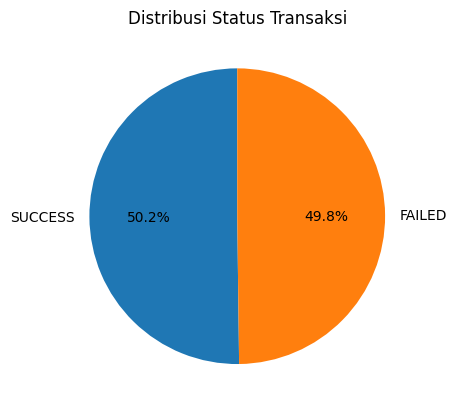

In [13]:
# Pie Chart Distribusi Status Transaksi
status_counts = df['Status'].value_counts()
status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Distribusi Status Transaksi')
plt.ylabel('')
plt.show()

- Tren Harian Transaksi Gagal

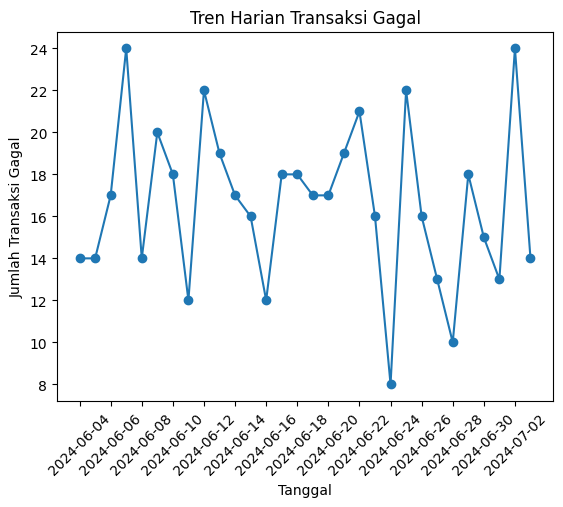

In [14]:
# Line Chart Tren Harian Transaksi Gagal
failed_by_day = failed_transactions.groupby(failed_transactions['Timestamp'].dt.date).size()
failed_by_day.plot(kind='line', marker='o', title="Tren Harian Transaksi Gagal", xlabel="Tanggal", ylabel="Jumlah Transaksi Gagal")

# Menyesuaikan label X agar tidak bertumpuk
plt.xticks(rotation=45, ticks=failed_by_day.index[::2])

plt.show()


- Tren Transaksi Gagal Berdasarkan Jam

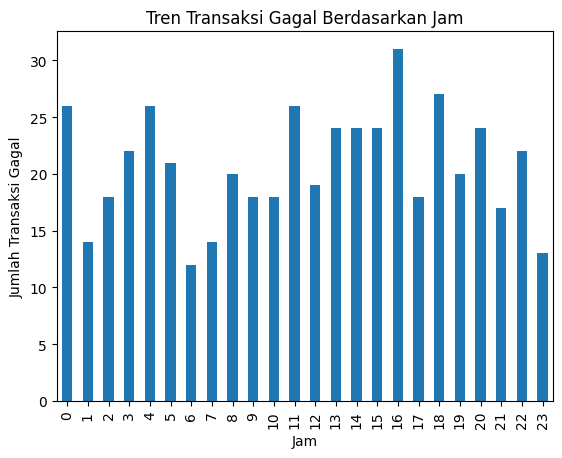

In [15]:
# Visualisasi menggunakan Bar Chart
failed_transactions_by_hour.plot(kind='bar', title="Tren Transaksi Gagal Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Transaksi Gagal")
plt.show()

### Insight 

Berdasarkan hasil analisis pada dataset **"transaction.csv"**, ditemukan bahwa hampir separuh dari total transaksi yang dilakukan mengalami kegagalan, dengan persentase kegagalan mencapai **49,8%**. Kegagalan tertinggi tercatat pada **tanggal 10 Juni 2024**, sementara kegagalan terendah terjadi pada **tanggal 24 Juni 2024**. Pada analisis kegagalan transaksi berdasarkan jam, ditemukan bahwa **jam 16:00** mencatatkan jumlah kegagalan terbanyak, yaitu **31 kasus**, sedangkan **jam 06:00** mencatatkan jumlah kegagalan paling sedikit, yaitu **12 kasus**. Selain itu, rata-rata nominal transaksi gagal adalah **4938.69 INR (Indian Rupee)**.

##### Saran Perbaikan:
1. Melakukan **audit sistem** untuk meningkatkan keandalan transaksi.
2. Meningkatkan **kapasitas sistem** pada jam sibuk, terutama pada jam **16:00**.
3. Memperbaiki sistem **verifikasi dan validasi transaksi** untuk mengurangi kegagalan.
4. Memberikan **komunikasi yang jelas** kepada pengguna terkait pemeliharaan sistem atau gangguan yang dapat memengaruhi transaksi.
